# MACHINE LEARNING: HOUSE PRICE PREDICTION

## BUSINESS PROBLEM ##
Customer want to predict house price for certain feature. So, they know how much money they'll need to buy that house. Given house data with it's price. Try to predict the price

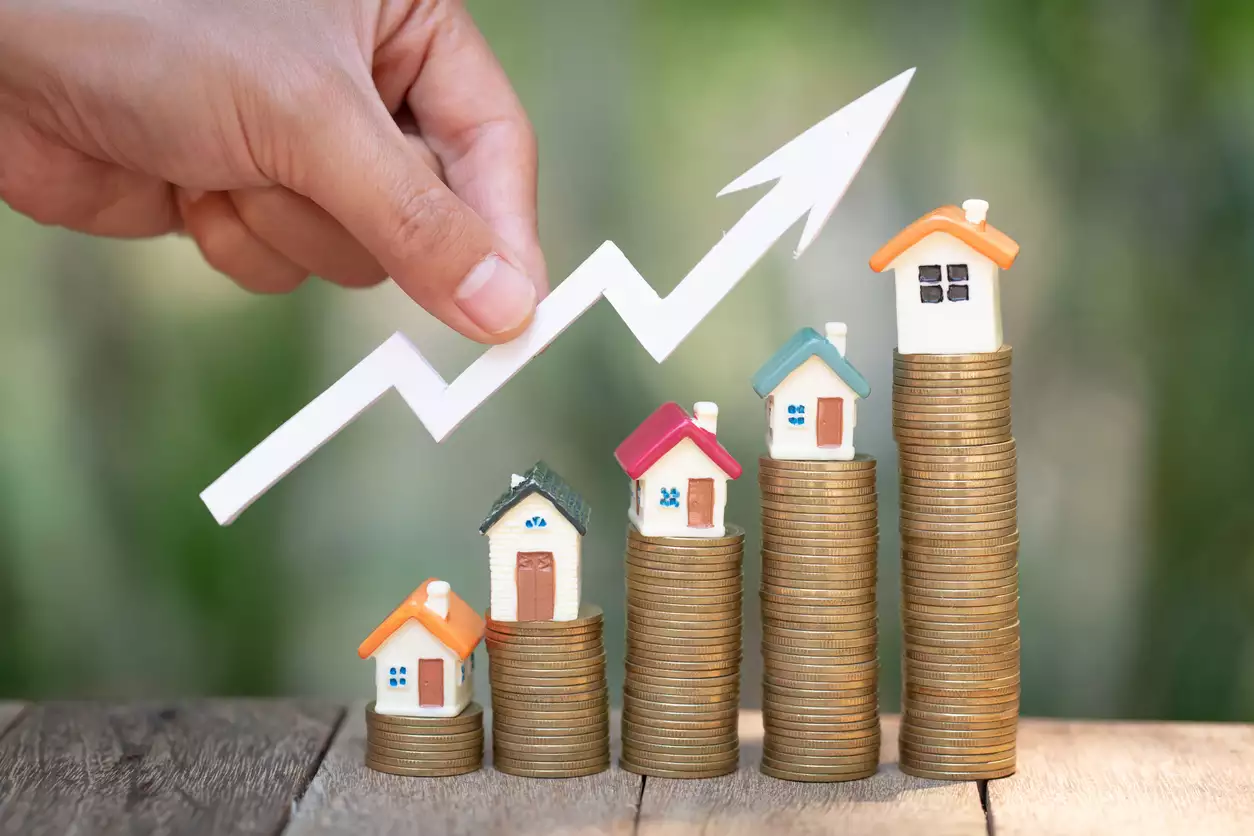

## DATA 

In [1]:
import pandas as pd

path = "C:/Users/David Yohast/Downloads/2021-08 Kaggle ML Learn/Data/train.csv"

# Setting for all columns shown
pd.set_option('display.max_columns', None)
home_data = pd.read_csv(path)

In [2]:
home_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

Data has 81 columns, from Id to SalePrice.
Variable which want to be predicted: SalePrice (Column 81)

In [3]:
columns = home_data.columns
columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Identify the output (Dependent Variable) = SalePrice

In [4]:
y = home_data["SalePrice"]
y.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## Feature Selection
Not all feature used in this project.
I only want to use:
- LotFrontage
- LotArea
- YearBuilt
- OverallQual
- 1stFlrSF
- 2ndFlrSF
- FullBath
- HalfBath
- BedroomAbvGr
- TotRmsAbvGrd
- Fireplaces


In [5]:
features = ["LotFrontage",
           "LotArea",
           "YearBuilt",
           "OverallQual",
           "1stFlrSF",
           "2ndFlrSF",
           "FullBath",
           "HalfBath",
           "BedroomAbvGr",
           "TotRmsAbvGrd",
           "Fireplaces"]

# Creating data which contain only those features
X = home_data[features]
X

,LotFrontage,LotArea,YearBuilt,OverallQual,1stFlrSF,2ndFlrSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces
0,65.0,8450,2003,7,856,854,2,1,3,8,0
1,80.0,9600,1976,6,1262,0,2,0,3,6,1
2,68.0,11250,2001,7,920,866,2,1,3,6,1
3,60.0,9550,1915,7,961,756,1,0,3,7,1
4,84.0,14260,2000,8,1145,1053,2,1,4,9,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,1999,6,953,694,2,1,3,7,1
1456,85.0,13175,1978,6,2073,0,2,0,3,7,2
1457,66.0,9042,1941,7,1188,1152,2,0,4,9,2
1458,68.0,9717,1950,5,1078,0,1,0,2,5,0


In [6]:
X.describe()

,LotFrontage,LotArea,YearBuilt,OverallQual,1stFlrSF,2ndFlrSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces
count,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,1971.267808,6.099315,1162.626712,346.992466,1.565068,0.382877,2.866438,6.517808,0.613014
std,24.284752,9981.264932,30.202904,1.382997,386.587738,436.528436,0.550916,0.502885,0.815778,1.625393,0.644666
min,21.000000,1300.000000,1872.000000,1.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,59.000000,7553.500000,1954.000000,5.000000,882.000000,0.000000,1.000000,0.000000,2.000000,5.000000,0.000000
50%,69.000000,9478.500000,1973.000000,6.000000,1087.000000,0.000000,2.000000,0.000000,3.000000,6.000000,1.000000
75%,80.000000,11601.500000,2000.000000,7.000000,1391.250000,728.000000,2.000000,1.000000,3.000000,7.000000,1.000000
max,313.000000,215245.000000,2010.000000,10.000000,4692.000000,2065.000000,3.000000,2.000000,8.000000,14.000000,3.000000


This X dataframe may contain NA. Lets find out

In [7]:
X.isna().sum()

LotFrontage     259
LotArea           0
YearBuilt         0
OverallQual       0
1stFlrSF          0
2ndFlrSF          0
FullBath          0
HalfBath          0
BedroomAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
dtype: int64

The Variable LotFrontage has 259 rows missing...
Its better to delete that column...

In [8]:
#Delete the column...
X = X.dropna(axis=1)
X

,LotArea,YearBuilt,OverallQual,1stFlrSF,2ndFlrSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces
0,8450,2003,7,856,854,2,1,3,8,0
1,9600,1976,6,1262,0,2,0,3,6,1
2,11250,2001,7,920,866,2,1,3,6,1
3,9550,1915,7,961,756,1,0,3,7,1
4,14260,2000,8,1145,1053,2,1,4,9,1
...,...,...,...,...,...,...,...,...,...,...
1455,7917,1999,6,953,694,2,1,3,7,1
1456,13175,1978,6,2073,0,2,0,3,7,2
1457,9042,1941,7,1188,1152,2,0,4,9,2
1458,9717,1950,5,1078,0,1,0,2,5,0


## Specify Model
The Model used in this project is DecisionTreeRegressor

In [9]:
#Use Scikit Learn
from sklearn.tree import DecisionTreeRegressor

#Define Model
house_model = DecisionTreeRegressor(random_state = 8)

#Fit the Model
house_model.fit(X,y)

DecisionTreeRegressor(random_state=8)

## Predict the values

In [10]:
prediction = house_model.predict(X)
print(prediction)

[208500. 181500. 223500. ... 266500. 142125. 147500.]


In [11]:
y.head(20)

0     208500
1     181500
2     223500
3     140000
4     250000
5     143000
6     307000
7     200000
8     129900
9     118000
10    129500
11    345000
12    144000
13    279500
14    157000
15    132000
16    149000
17     90000
18    159000
19    139000
Name: SalePrice, dtype: int64

In [12]:
pred_df = pd.DataFrame(prediction)
pred_df.head(20)

,0
0,208500.0
1,181500.0
2,223500.0
3,140000.0
4,250000.0
5,143000.0
6,307000.0
7,200000.0
8,129900.0
9,118000.0


## Performance Assessment
Using Mean Absolute Error

In [13]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y, prediction)

22.160273972602738

## Seems good, but my Data need to separated to train and val
Why? because my model is only good in-sample cases. Let's try to separate them

In [14]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=40)


Fit the model

In [15]:
print(y.shape)
print(X.shape)

(1460,)
(1460, 10)


In [16]:
new_house_model = DecisionTreeRegressor(random_state=40)

new_house_model.fit(train_X, train_y)

DecisionTreeRegressor(random_state=40)

The Prediction

In [17]:
new_prediction = new_house_model.predict(test_X)

In [18]:
print(new_prediction[:5])
print(test_y.head())

[194000. 155000. 235000. 172400. 341000.]
1258    190000
1041    173000
1181    392500
1108    181000
554     284000
Name: SalePrice, dtype: int64


The Assessment

In [19]:
mae = mean_absolute_error(new_prediction, test_y)

print(mae)

27921.290410958904


## Let's try to tune them with the max_node leaf.

we have to know, which max_node_leaf gives best result.

In [23]:
def get_mae (max_leaf_nodes, train_X, test_X, train_y, test_y):
    model = DecisionTreeRegressor(max_leaf_nodes = max_leaf_nodes, random_state = 45)
    model.fit(train_X, train_y)
    prediction_value = model.predict(test_X)
    mae_value = mean_absolute_error(test_y, prediction_value)
    return mae_value

In [24]:
list_of_leaf_nodes = [5, 10, 20, 50, 100, 150, 200, 250, 400, 500, 750, 1000]

for leaf in list_of_leaf_nodes:
    mae_value = get_mae(leaf, train_X, test_X, train_y, test_y)
    print("Number of leaves= {} \t\t\t Mean Absolute Error= {}".format(leaf, mae_value))

Number of leaves= 5 			 Mean Absolute Error= 31102.04629804583
Number of leaves= 10 			 Mean Absolute Error= 26648.440371430097
Number of leaves= 20 			 Mean Absolute Error= 26046.173325457086
Number of leaves= 50 			 Mean Absolute Error= 25306.558551286813
Number of leaves= 100 			 Mean Absolute Error= 24502.68749392686
Number of leaves= 150 			 Mean Absolute Error= 25562.628740295397
Number of leaves= 200 			 Mean Absolute Error= 24639.27076095091
Number of leaves= 250 			 Mean Absolute Error= 24325.06564005352
Number of leaves= 400 			 Mean Absolute Error= 25172.770658686288
Number of leaves= 500 			 Mean Absolute Error= 25852.921434007396
Number of leaves= 750 			 Mean Absolute Error= 26214.28836703631
Number of leaves= 1000 			 Mean Absolute Error= 26217.51894977169


In [25]:
best_leaf = 250

## Let's rebuild the model

In [30]:
final_house_model = DecisionTreeRegressor(max_leaf_nodes=best_leaf, random_state=45)
final_house_model.fit(train_X, train_y)

final_prediction = final_house_model.predict(test_X)
mean_absolute_error(test_y, final_prediction)

24325.06564005352

## Let's Try using Random Forest

Let's compare it!

In [32]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state = 45)

rf_model.fit(train_X, train_y)

rf_val_predictions = rf_model.predict(test_X)
rf_val_mae = mean_absolute_error(test_y, rf_val_predictions)

print("Validation MAE for Random Forest Model: {}".format(rf_val_mae))

Validation MAE for Random Forest Model: 19128.331784474885


# Conclusion

## Which one is the best?
From Decision Tree to Random Forest, we can conclude that Random Forest perform better in predicting House Price

## Why?
Because the error value is less than Decision tree, even in Decision Tree we have already tune to the best.
As you can see
- Decision Tree Mean Absolute Error: 24325.06564005352
- Random Forest Mean Absolute Error: 19128.331784474885

# Now Lets Use Real Train and Test data
data that we use before was only from train, lets take a look at test data

In [34]:
test_path = "C:/Users/David Yohast/Downloads/2021-08 Kaggle ML Learn/Data/test.csv"

# Setting for all columns shown
pd.set_option('display.max_columns', None)
test_home_data = pd.read_csv(test_path)
test_home_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

In [36]:
test_columns = test_home_data.columns
test_columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

The Test data is real case where the Sale Price is unknown, but we have the feature, and want to predict using Model that we made

## Feature Selection on Test Data

Remember, feature that we set before? We only used some feature, not all

In [39]:
test_X = test_home_data[features]
test_X.isnull().sum()

LotFrontage     227
LotArea           0
YearBuilt         0
OverallQual       0
1stFlrSF          0
2ndFlrSF          0
FullBath          0
HalfBath          0
BedroomAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
dtype: int64

In [40]:
test_X = test_X.dropna(axis=1)
test_X.isnull().sum()

LotArea         0
YearBuilt       0
OverallQual     0
1stFlrSF        0
2ndFlrSF        0
FullBath        0
HalfBath        0
BedroomAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
dtype: int64

In [41]:
test_X

,LotArea,YearBuilt,OverallQual,1stFlrSF,2ndFlrSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces
0,11622,1961,5,896,0,1,0,2,5,0
1,14267,1958,6,1329,0,1,1,3,6,0
2,13830,1997,5,928,701,2,1,3,6,1
3,9978,1998,6,926,678,2,1,3,7,1
4,5005,1992,8,1280,0,2,0,2,5,0
...,...,...,...,...,...,...,...,...,...,...
1454,1936,1970,4,546,546,1,1,3,5,0
1455,1894,1970,4,546,546,1,1,3,6,0
1456,20000,1960,5,1224,0,1,0,4,7,1
1457,10441,1992,5,970,0,1,0,3,6,0


## The, the Random Forest can use all the TRAIN data to really train it

In [42]:
rf_model_full = RandomForestRegressor(random_state = 45)

rf_model_full.fit(X,y)

RandomForestRegressor(random_state=45)

## This is the result of prediction

In [43]:
pred = rf_model_full.predict(test_X)

results = test_X.copy()
results['PredictedPrice']= pred
results

,LotArea,YearBuilt,OverallQual,1stFlrSF,2ndFlrSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,PredictedPrice
0,11622,1961,5,896,0,1,0,2,5,0,129468.50
1,14267,1958,6,1329,0,1,1,3,6,0,152379.00
2,13830,1997,5,928,701,2,1,3,6,1,165828.80
3,9978,1998,6,926,678,2,1,3,7,1,176131.94
4,5005,1992,8,1280,0,2,0,2,5,0,191199.56
...,...,...,...,...,...,...,...,...,...,...,...
1454,1936,1970,4,546,546,1,1,3,5,0,81930.00
1455,1894,1970,4,546,546,1,1,3,6,0,81815.00
1456,20000,1960,5,1224,0,1,0,4,7,1,157070.60
1457,10441,1992,5,970,0,1,0,3,6,0,127631.53
